# Logistic Regression Model
Earthquake in Taiwan in 2024-04



# Importing Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted


# Reading Earthquake in Taiwan in 2024-04 File

In [2]:
df = pd.read_csv("/kaggle/input/earthquake-in-japan/taiwan_20240423_query.csv")

In [3]:
df.head(15)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-04-23T05:08:05.896Z,23.7091,121.6223,10.000,4.7,mb,32,89,0.434,1.09,...,2024-04-23T05:42:31.040Z,"29 km S of Hualien City, Taiwan",earthquake,2.84,1.903,0.090,37,reviewed,us,us
1,2024-04-23T02:21:00.705Z,23.8434,121.5903,10.000,5.2,mwr,60,62,0.523,0.73,...,2024-04-23T02:49:32.541Z,"14 km S of Hualien City, Taiwan",earthquake,1.95,1.844,0.068,21,reviewed,us,us
2,2024-04-23T01:45:46.308Z,23.7842,121.5822,10.000,4.9,mww,69,79,0.470,0.87,...,2024-04-23T02:42:44.717Z,"21 km S of Hualien City, Taiwan",earthquake,2.80,1.555,0.103,9,reviewed,us,us
3,2024-04-23T01:22:43.553Z,23.8391,121.5765,10.000,4.7,mb,65,39,0.513,0.53,...,2024-04-23T04:50:51.040Z,"15 km S of Hualien City, Taiwan",earthquake,3.03,1.808,0.077,51,reviewed,us,us
4,2024-04-23T01:19:33.210Z,23.8235,121.5953,12.193,4.6,mb,47,37,0.509,0.60,...,2024-04-23T04:25:02.040Z,"17 km S of Hualien City, Taiwan",earthquake,2.67,4.526,0.095,33,reviewed,us,us
5,2024-04-23T00:11:02.661Z,23.8982,121.5981,13.296,5.2,mb,43,78,0.574,0.65,...,2024-04-23T00:56:39.901Z,"8 km S of Hualien City, Taiwan",earthquake,3.10,3.849,0.060,92,reviewed,us,us
6,2024-04-23T00:04:05.608Z,23.8026,121.6764,13.118,5.8,mww,64,30,0.536,0.96,...,2024-04-23T04:54:31.959Z,"20 km SSE of Hualien City, Taiwan",earthquake,3.20,4.606,0.065,23,reviewed,us,us
7,2024-04-23T00:03:49.290Z,23.6992,121.6391,20.652,4.5,mb,29,86,0.438,0.82,...,2024-04-23T00:25:59.040Z,"30 km S of Hualien City, Taiwan",earthquake,2.72,6.048,0.085,41,reviewed,us,us
8,2024-04-22T23:35:39.486Z,23.8142,121.5956,11.844,4.3,mb,30,86,0.501,0.75,...,2024-04-22T23:48:33.040Z,"18 km S of Hualien City, Taiwan",earthquake,2.34,5.028,0.147,13,reviewed,us,us
9,2024-04-22T23:02:44.117Z,23.7274,121.5503,9.729,4.5,mwr,41,82,0.406,0.58,...,2024-04-22T23:22:01.040Z,"28 km SSW of Hualien City, Taiwan",earthquake,2.48,5.410,0.073,18,reviewed,us,us


In [4]:
len(df)

207

# Droping columns

In [5]:
df.drop(columns=["gap", "rms", "net", "updated", "nst", "id", "status", "magNst", "locationSource", "magSource"], inplace=True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             207 non-null    object 
 1   latitude         207 non-null    float64
 2   longitude        207 non-null    float64
 3   depth            207 non-null    float64
 4   mag              207 non-null    float64
 5   magType          207 non-null    object 
 6   dmin             207 non-null    float64
 7   place            207 non-null    object 
 8   type             207 non-null    object 
 9   horizontalError  207 non-null    float64
 10  depthError       207 non-null    float64
 11  magError         207 non-null    float64
dtypes: float64(8), object(4)
memory usage: 19.5+ KB


In [7]:
df["mag"].astype(int)

0      4
1      5
2      4
3      4
4      4
      ..
202    6
203    7
204    4
205    4
206    4
Name: mag, Length: 207, dtype: int64

# Create a binary target variable based on earthquake magnitude

In [8]:
#converting the values in the 'mag' column to numeric values.
df['mag'] = pd.to_numeric(df['mag'], errors='coerce')

df['severe_earthquake'] = (df['mag'] > 4.4).astype(int)


In [9]:
print(df["severe_earthquake"].value_counts())

severe_earthquake
1    136
0     71
Name: count, dtype: int64


# Correlation heatmap 
**In the heatmap, we can analyze the relation as light Colors (Near 1) represents High positive correlation,dark Colors (Near -1) represents High negative correlation and medium Colors (Around 0) represents Low or no correlation.**

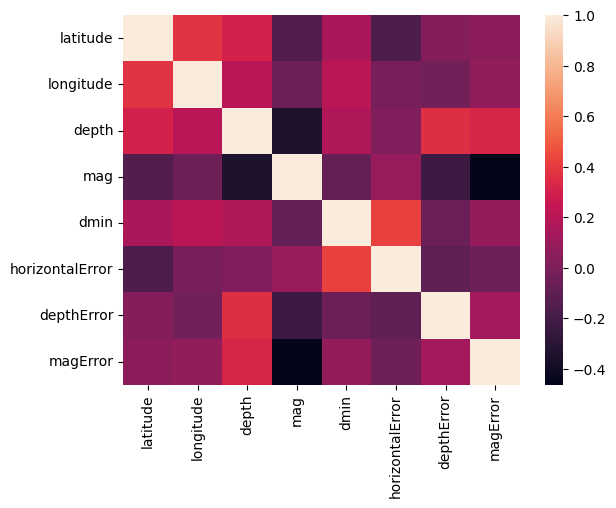

In [10]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="severe_earthquake").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation);


# Box Plot of Distribution of variable dim
**This box plot helps visualize the central tendency and variability of the "dmin" variable for different categories of earthquake severity.
The distribution of "dmin" is fairly similar for both non-severe and severe earthquakes, with medians and IQRs being close.The presence of outliers in both categories indicates that there can be significant variation in the minimum distance to the epicenter for individual earthquakes, irrespective of their severity.The single severe outlier suggests that while most severe earthquakes have a "dmin" within a certain range, there can be exceptions with much larger distances.**

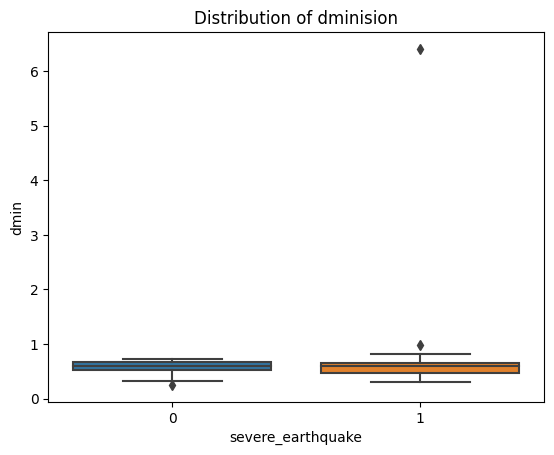

In [11]:
# Create boxplot
sns.boxplot(x="severe_earthquake", y="dmin", data = df)
# Label axes
plt.xlabel("severe_earthquake")
plt.ylabel("dmin")
plt.title("Distribution of dminision");

# Class Balance
**Frequrncy of severe qarthquake and not severe qarthquake.**


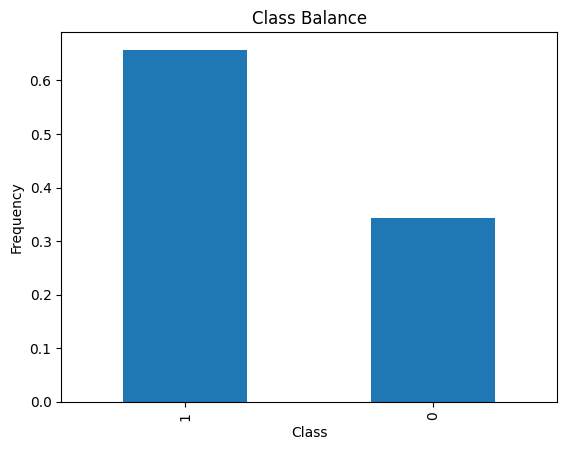

In [12]:
df["severe_earthquake"].value_counts(normalize=True).plot(
    kind ="bar", xlabel="Class", ylabel="Frequency", title="Class Balance" 

);

In [13]:
majority_class_prop,minority_class_prop = df["severe_earthquake"].value_counts(normalize=True)
print(majority_class_prop,minority_class_prop)

0.6570048309178744 0.34299516908212563


# Calculating number of unique values in each of those columns.

In [14]:
df.select_dtypes("object").nunique()

time       207
magType      3
place      149
type         1
dtype: int64

# Droping Leacky Colunms

In [15]:
df.drop(columns=["place"],inplace=True)


In [16]:
df.select_dtypes("object").nunique()

time       207
magType      3
type         1
dtype: int64

# Create your feature matrix X and target vector y.

In [17]:
target = "severe_earthquake"
X = df.drop(columns=target)
y = df[target]

# Dividing data into training and test sets using a randomized train-test split.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state= 42

)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (165, 11)
y_train shape: (165,)
X_test shape: (42, 11)
y_test shape: (42,)


# Calculating baseline accuracy score for the model.

In [19]:
acc_baseline = y_train.value_counts(normalize= True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.64


#  Create a pipeline named model that contains a OneHotEncoder transformer and a LogisticRegression predictor.

In [20]:
model = make_pipeline(
    OneHotEncoder( use_cat_names= True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['time', 'magType', 'type'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Calculate the training and test accuracy scores for the model.

In [21]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.99
Test Accuracy: 0.95


In [22]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]

In [23]:
feat_imp = pd.Series(np.exp(importances), index=features).sort_values()

# Create a pandas Series named odds_ratios, where the index is features and the values are exponential of the importances

In [24]:
#Interpreting odds ratios in logistic regression entails understanding how predictor
#variables influence the likelihood of the outcome. A ratio greater than 1 indicates a 
#positive association, implying higher odds of the outcome, while a ratio less than 1 
#signifies a negative association, suggesting lower odds.
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

time_2024-04-05T16:22:28.272Z    0.585248
magType_mwr                      0.603526
time_2024-04-05T10:08:49.507Z    0.608914
time_2024-04-22T23:35:39.486Z    0.621685
time_2024-04-20T00:35:11.295Z    0.623511
dtype: float64

# Horizontal bar chart, five largest coefficients

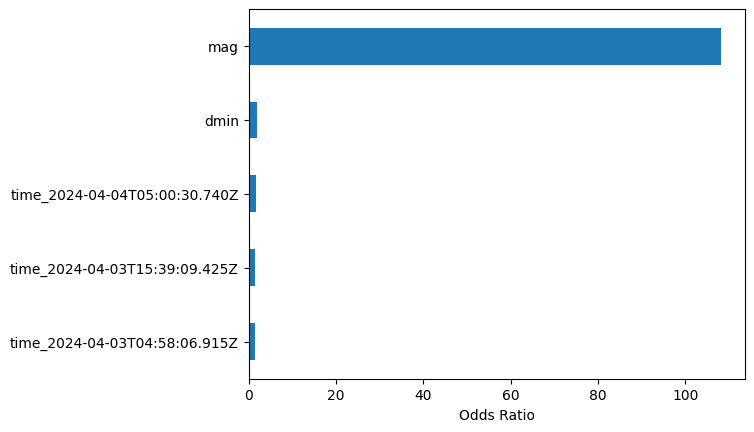

In [25]:
odds_ratios.tail().plot(kind  = "barh")
plt.xlabel("Odds Ratio");

# Create a horizontal bar chart with the five smallest coefficients

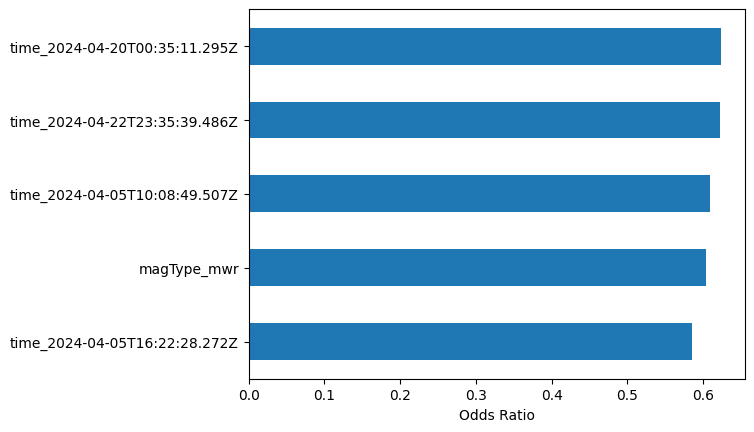

In [26]:
odds_ratios.head().plot(kind  = "barh")
plt.xlabel("Odds Ratio");

In [27]:
y_pred = model.predict(X_train)
for i, (actual, predicted) in enumerate(zip(y_test, y_pred), 1):
    if i % 1000 == 0:
        print(f"Iteration: {i}  |  Actual Magnitude: {actual:.2f}  |  Predicted Magnitude: {predicted:.2f}")

In [28]:
for i, (actual, predicted) in enumerate(zip(y_test, y_pred), 1):
    if i % 1000 == 0:
        print(f"Iteration: {i}  |  Actual Magnitude: {actual:.2f}  |  Predicted Magnitude: {predicted:.2f}")

# DECISION TREE MODEL

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state= 42
)

In [30]:
X_train, X_val, y_train, y_val =train_test_split(
 X_train,y_train, test_size=0.2, random_state= 42
)

In [31]:
model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(max_depth=6,random_state=42)
)
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['time', 'magType', 'type'],
                                mapping=[{'col': 'time',
                                          'data_type': dtype('O'),
                                          'mapping': 2024-04-09T01:33:12.926Z      1
2024-04-08T18:02:37.030Z      2
2024-04-03T01:53:57.440Z      3
2024-04-06T13:17:52.876Z      4
2024-04-03T21:56:11.907Z      5
                           ... 
2024-04-03T01:07:17.114Z    129
2024-04-03T01:39:46.326Z    130
2024-04-06T06:02:19.022Z    131
2024-04-17T09:17:10.725Z    132
NaN                          -2
Length: 133, dtype: int64},
                                         {'col': 'magType',
                                          'data_type': dtype('O'),
                                          'mapping': mb     1
mwr    2
mww    3
NaN   -2
dtype: int64},
                                         {'col': 'type',
                                          'data_type': dtype('O'),
                                          'mapping': earthquake    1
NaN          -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [32]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 1.0


In [33]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 1


In [34]:
depth_hyperparams = range(1,50,2)

In [35]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = model = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=d,random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [1.0, 1.0, 1.0]
Validation Accuracy Scores: [1.0, 1.0, 1.0]


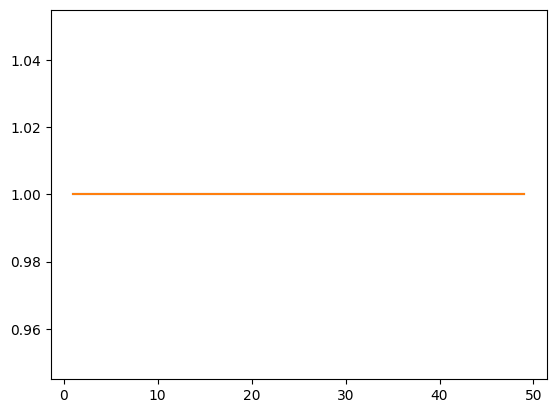

In [36]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc,label="training")
plt.plot(depth_hyperparams, validation_acc,label="validation");

In [37]:
test_acc = model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 1.0


In [38]:
X_train.columns.to_list()

['time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'dmin',
 'type',
 'horizontalError',
 'depthError',
 'magError']

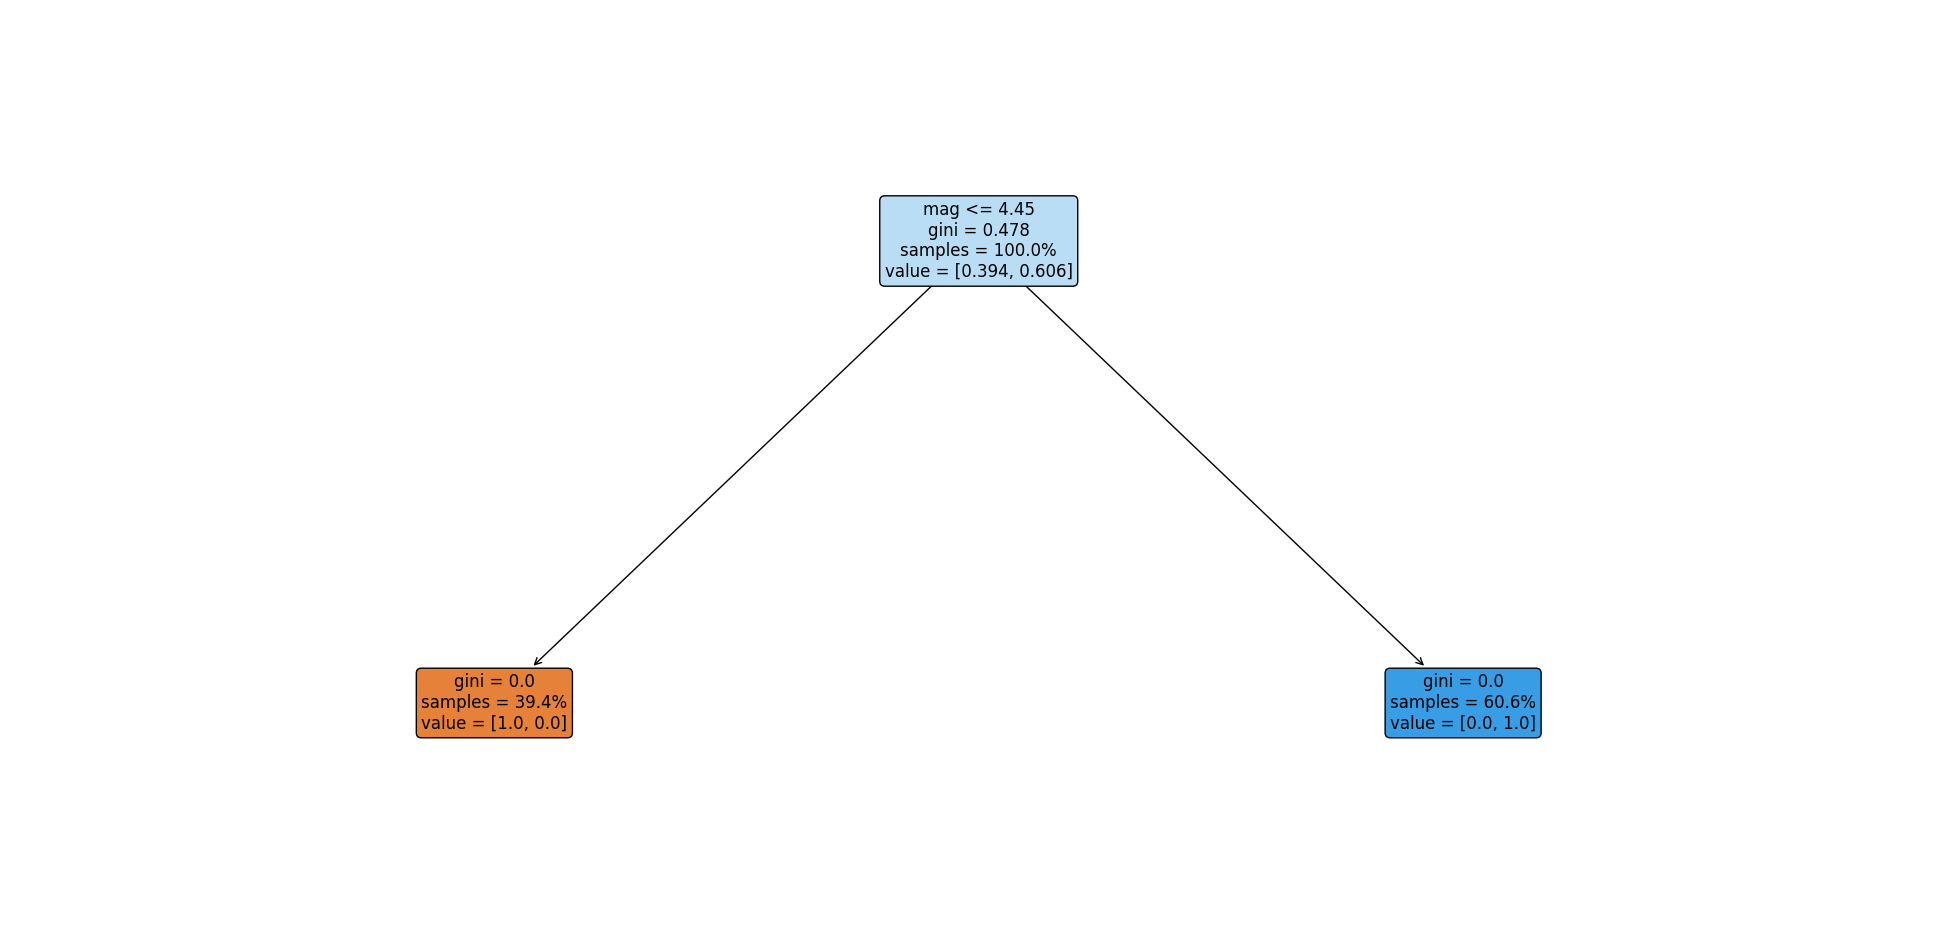

In [39]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [40]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])


Features: Index(['time', 'latitude', 'longitude'], dtype='object')
Importances: [0. 0. 0.]


In [41]:
feat_imp = pd.Series(importances,index = features).sort_values()
feat_imp.head()

time         0.0
latitude     0.0
longitude    0.0
depth        0.0
magType      0.0
dtype: float64

Text(0, 0.5, 'Features')

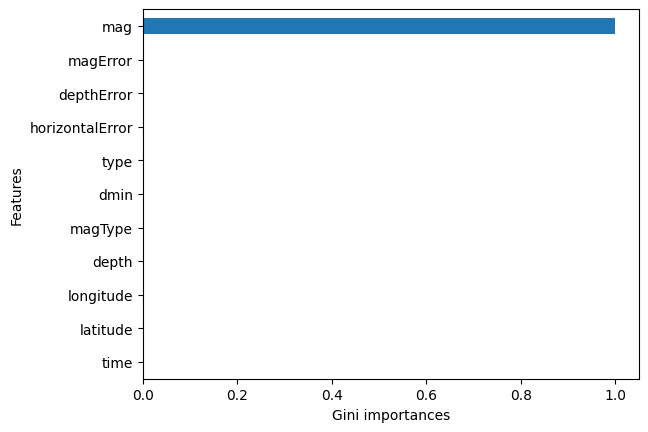

In [42]:
# Create horizontal bar chart
feat_imp.plot(kind= "barh")
plt.xlabel("Gini importances")
plt.ylabel("Features")
